# Data: https://www.kaggle.com/rahulsathyajit/shark-tank-pitches

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
%matplotlib inline

In [2]:
df = pd.read_csv('shark_tank.csv')

In [3]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [5]:
int(df.deal[0])

0

In [6]:
df.deal=(df.deal).astype(int)

In [7]:
df['Multiple Entreprenuers']=(df['Multiple Entreprenuers']).astype(int)

In [8]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


In [9]:
df.category.value_counts()

Specialty Food                                 62
Novelties                                      35
Baby and Child Care                            24
Online Services                                22
Personal Care and Cosmetics                    20
Toys and Games                                 19
Storage and Cleaning Products                  17
Outdoor Recreation                             16
Electronics                                    14
Consumer Services                              13
Entertainment                                  13
Pet Products                                   13
Kitchen Tools                                  12
Professional Services                          10
Women's Apparel                                10
Automotive                                     10
Baby and Children's Entertainment               9
Men and Women's Apparel                         9
Holiday Cheer                                   8
Women's Accessories                             8


In [10]:
for i in range(len(df)):
    df.location.iloc[i]=df.location[i].split(',')[1]

In [11]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


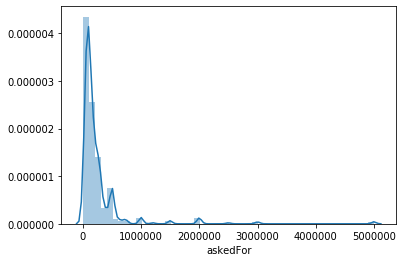

In [12]:
sns.distplot(df.askedFor)

In [13]:
df['website_length']=0
for i in range(len(df)):
    try:
        df['website_length'][i]=len(df.website[i])
    except:
        df['website_length'][i]=0

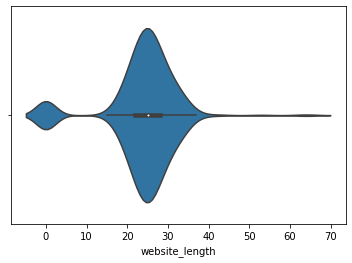

In [14]:
sns.violinplot(df.website_length)

In [15]:
pd.cut(df.website_length,bins=3).unique()

[(-0.065, 21.667], (21.667, 43.333], (43.333, 65.0]]
Categories (3, interval[float64]): [(-0.065, 21.667] < (21.667, 43.333] < (43.333, 65.0]]

In [16]:
df.website_length=pd.cut(df.website_length,bins=3,labels=['short','medium','long'])

In [17]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,website_length
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0,short
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0,short
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0,medium
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0,medium
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0,medium


In [18]:
df.columns = df.columns.str.replace(' ', '_')

In [19]:
df.columns

Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'Multiple_Entreprenuers', 'website_length'],
      dtype='object')

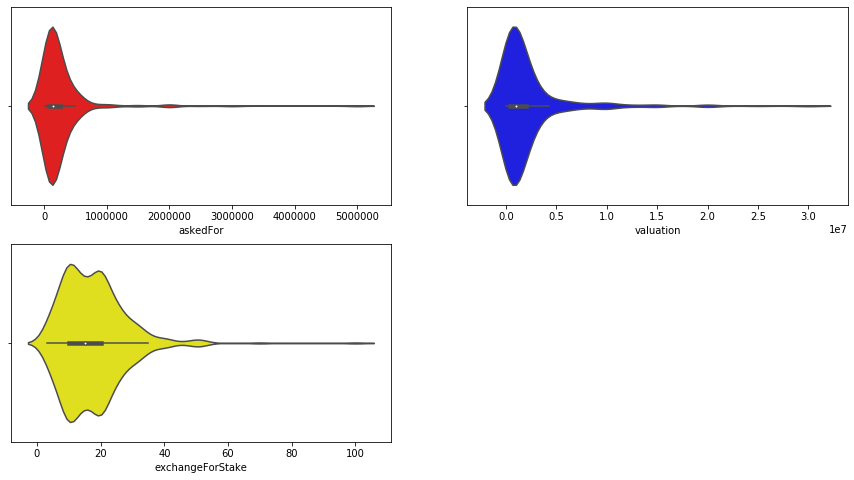

In [20]:
i=1
j=0
colors=['red','blue','yellow']
plt.figure(figsize=(15,8))
for col in ['askedFor','valuation','exchangeForStake']:
    plt.subplot(2,2,i)
    sns.violinplot(df[col],color=colors[j])
    i=i+1
    j+=1

In [21]:
def filter_outliers(dataframe,threshold):
    """
    Input a data frame and have all outliers filtered to a certain and custom threshold of standard deviations
    """
    dataframe = dataframe[(np.abs(stats.zscore(dataframe)) <= threshold).all(axis=1)]
    return dataframe

In [22]:
df.shape

(495, 20)

In [23]:
df_filter_num = filter_outliers(df.select_dtypes(include=[int,float]),2)

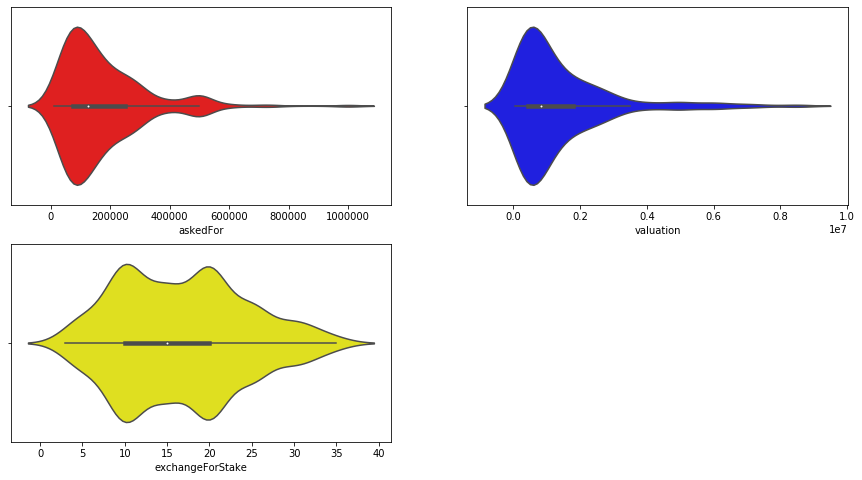

In [24]:
i=1
j=0
colors=['red','blue','yellow']
plt.figure(figsize=(15,8))
for col in ['askedFor','valuation','exchangeForStake']:
    plt.subplot(2,2,i)
    sns.violinplot(df_filter_num[col],color=colors[j])
    i=i+1
    j+=1

In [25]:
df_filter_num['asked_size']=pd.cut(df_filter_num.askedFor,bins=3,labels=['small','medium','large'])
df_filter_num['value_size']=pd.cut(df_filter_num.askedFor,bins=3,labels=['small','medium','large'])

In [26]:
df_filter_cat = df[df.index.isin(df_filter_num.index)].select_dtypes(include='O')

In [27]:
df_filter_cat.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,episode-season
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1
5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2


In [28]:
df_filter=pd.concat([df_filter_cat,df_filter_num],axis=1)

In [29]:
print(df_filter.shape)
df_filter.head()

(433, 21)


,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,0,1,1000000,15,6666667,1,0,large,large
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,1,1,460000,10,4600000,1,0,medium,medium
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,1,1,50000,15,333333,1,0,small,small
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,0,1,250000,25,1000000,1,0,small,small
5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-2,1,2,500000,15,3333333,1,0,medium,medium


In [30]:
df_filter.reset_index(inplace=True)

In [31]:
df_filter.head()

,index,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,...,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1-1,0,1,1000000,15,6666667,1,0,large,large
1,1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1-1,1,1,460000,10,4600000,1,0,medium,medium
2,2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1-1,1,1,50000,15,333333,1,0,small,small
3,3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1-1,0,1,250000,25,1000000,1,0,small,small
4,5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,1-2,1,2,500000,15,3333333,1,0,medium,medium


In [32]:
df_filter.drop('index',axis=1,inplace=True)

In [33]:
df_filter.shape

(433, 21)

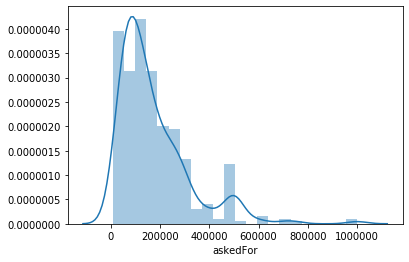

In [34]:
sns.distplot(df_filter.askedFor)

In [35]:
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,0,1,1000000,15,6666667,1,0,large,large
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,1,1,460000,10,4600000,1,0,medium,medium
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,1,1,50000,15,333333,1,0,small,small
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,0,1,250000,25,1000000,1,0,small,small
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-2,1,2,500000,15,3333333,1,0,medium,medium


In [36]:
df_filter.website.fillna('none',inplace=True)

In [37]:
for i in range(len(df_filter)):
    if df_filter.website[i]=='none':
        df_filter.website[i]=0
    else:
        df_filter.website[i]=1

In [38]:
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,episode-season,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,0,1,1000000,15,6666667,1,0,large,large
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,1,1,460000,10,4600000,1,0,medium,medium
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,1,1,50000,15,333333,1,0,small,small
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-1,0,1,250000,25,1000000,1,0,small,small
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1-2,1,2,500000,15,3333333,1,0,medium,medium


In [39]:
df_filter.category.value_counts()

Specialty Food                                 59
Novelties                                      31
Baby and Child Care                            23
Personal Care and Cosmetics                    19
Online Services                                18
Storage and Cleaning Products                  17
Toys and Games                                 15
Consumer Services                              12
Kitchen Tools                                  11
Pet Products                                   11
Outdoor Recreation                             10
Electronics                                     9
Men and Women's Apparel                         9
Baby and Children's Entertainment               9
Baby and Children's Apparel and Accessories     8
Women's Apparel                                 8
Entertainment                                   8
Automotive                                      8
Professional Services                           8
Undergarments and Basics                        7


In [42]:
pitch_cat_df=pd.get_dummies(df_filter.category)

In [44]:
pitch_cat_df=pitch_cat_df.drop("Women's Shoes",axis=1)

In [45]:
df_filter.drop('category',axis=1,inplace=True)

In [46]:
for col in pitch_cat_df.columns:
    df_filter[col]=pitch_cat_df[col]

In [47]:
df_filter

,description,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,...,Professional Services,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel
0,Bluetooth device implant for your ear.,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,...,0,0,0,0,0,0,0,0,0,0
1,Retail and wholesale pie factory with two reta...,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,...,0,1,0,0,0,0,0,0,0,0
2,Ava the Elephant is a godsend for frazzled par...,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,...,0,0,0,0,0,0,0,0,0,0
3,"Organizing, packing, and moving services deliv...","Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,...,0,0,0,0,0,0,0,0,0,0
4,One of the first entrepreneurs to pitch on Sha...,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Ultra-thin insoles that add protection without...,Bryan Scott,GA,1,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Noene USA,...,0,0,0,0,0,0,0,0,0,0
429,Buck Mason makes high-quality men's clothing i...,Sasha Koehn and Erik Schnakenberg,CA,1,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Buck Mason,...,0,0,0,0,0,0,0,0,0,0
430,Started in 2011 by three-time world record Str...,Greg Myerson,CT,1,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,World Record Striper Company,...,0,0,0,0,0,0,0,0,0,0
431,"Frameri answers the question, ""Why aren't your...",Konrad Billetz and Kevin Habich,OH,1,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Frameri,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_filter.columns

Index(['description', 'entrepreneurs', 'location', 'website', 'shark1',
       'shark2', 'shark3', 'shark4', 'shark5', 'title', 'episode-season',
       'deal', 'episode', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'Multiple_Entreprenuers', 'asked_size', 'value_size',
       'Alcoholic Beverages', 'Automotive', 'Baby and Child Care',
       'Baby and Children's Apparel and Accessories',
       'Baby and Children's Bedding', 'Baby and Children's Entertainment',
       'Baby and Children's Food', 'Consumer Services', 'Costumes', 'Cycling',
       'Education', 'Electronics', 'Entertainment', 'Fashion Accessories',
       'Fitness Apparel and Accessories', 'Fitness Equipment',
       'Fitness Programs', 'Furniture', 'Gardening', 'Golf Products',
       'Health and Well-Being', 'Holiday Cheer', 'Home Accessories',
       'Home Improvement', 'Home Security Solutions', 'Homeopathic Remedies',
       'Kitchen Tools', 'Maternity', 'Men and Women's Accessories',
       'Men an

In [70]:
df_filter.head()

,description,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,...,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel,sharks
0,Bluetooth device implant for your ear.,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,...,0,0,0,0,0,0,0,0,0,<class 'list'>
1,Retail and wholesale pie factory with two reta...,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,...,1,0,0,0,0,0,0,0,0,<class 'list'>
2,Ava the Elephant is a godsend for frazzled par...,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,...,0,0,0,0,0,0,0,0,0,<class 'list'>
3,"Organizing, packing, and moving services deliv...","Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,...,0,0,0,0,0,0,0,0,0,<class 'list'>
4,One of the first entrepreneurs to pitch on Sha...,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,...,1,0,0,0,0,0,0,0,0,<class 'list'>


In [77]:
for i in range(len(df_filter)):
    df_filter['sharks'][i]=[]

In [79]:
for i in range(len(df_filter)):
    df_filter['sharks'][i].append([df_filter.shark1[i],df_filter.shark2[i],df_filter.shark3[i],df_filter.shark4[i],df_filter.shark5[i]])

In [80]:
df_filter.head()

,description,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,...,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel,sharks
0,Bluetooth device implant for your ear.,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,...,0,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
1,Retail and wholesale pie factory with two reta...,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,...,1,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
2,Ava the Elephant is a godsend for frazzled par...,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,...,0,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
3,"Organizing, packing, and moving services deliv...","Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,...,0,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
4,One of the first entrepreneurs to pitch on Sha...,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,...,1,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."


In [83]:
for i in range(len(df_filter)):
    df_filter.sharks[i]=df_filter.sharks[i][0]

In [84]:
df_filter.head()

,description,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,...,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel,sharks
0,Bluetooth device implant for your ear.,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,...,0,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
1,Retail and wholesale pie factory with two reta...,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,...,1,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
2,Ava the Elephant is a godsend for frazzled par...,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,...,0,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
3,"Organizing, packing, and moving services deliv...","Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,...,0,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
4,One of the first entrepreneurs to pitch on Sha...,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,...,1,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."


In [90]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 74 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   description                                  433 non-null    object  
 1   entrepreneurs                                366 non-null    object  
 2   location                                     433 non-null    object  
 3   website                                      433 non-null    object  
 4   shark1                                       433 non-null    object  
 5   shark2                                       433 non-null    object  
 6   shark3                                       433 non-null    object  
 7   shark4                                       433 non-null    object  
 8   shark5                                       433 non-null    object  
 9   title                                        433 non-null    obje

In [98]:
df_filter.sharks.astype(str).unique()

array(['[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Kevin Harrington\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Jeff Foxworthy\', \'Daymond John\']',
       '[\'Lori Greiner\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', \'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'John Paul DeJoria\']',
       '[\'Lori Greiner\', \'Steve Tisch\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'Nick Woodman\']'],
      dtype=object)

In [106]:
sharks_dict={
    'group_1':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Kevin Harrington'],
    'group_2':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_3':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Jeff Foxworthy', 'Daymond John'],
    'group_4':['Lori Greiner', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_5':['Lori Greiner', 'Barbara Corcoran', 'Robert Herjavec', "Kevin O\'Leary", 'Mark Cuban'],
    'group_6':['Lori Greiner', "Kevin O'Leary", 'Daymond John', 'Mark Cuban', 'John Paul DeJoria'],
    'group_7':['Lori Greiner', 'Steve Tisch', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_8':['Lori Greiner', "Kevin O'Leary", 'Daymond John', 'Mark Cuban', 'Nick Woodman']
}

In [110]:
df_filter['shark_group']=None

In [111]:
for i in range(len(df_filter)):
    if df_filter.sharks[i]==sharks_dict['group_1']:
        df_filter.shark_group[i]=1
    elif df_filter.sharks[i]==sharks_dict['group_2']:
        df_filter.shark_group[i]=2
    elif df_filter.sharks[i]==sharks_dict['group_3']:
        df_filter.shark_group[i]=3
    elif df_filter.sharks[i]==sharks_dict['group_4']:
        df_filter.shark_group[i]=4
    elif df_filter.sharks[i]==sharks_dict['group_5']:
        df_filter.shark_group[i]=5
    elif df_filter.sharks[i]==sharks_dict['group_6']:
        df_filter.shark_group[i]=6
    elif df_filter.sharks[i]==sharks_dict['group_7']:
        df_filter.shark_group[i]=7
    else:
        df_filter.shark_group[i]=8

In [113]:
df_filter.columns

Index(['description', 'entrepreneurs', 'location', 'website', 'shark1',
       'shark2', 'shark3', 'shark4', 'shark5', 'title', 'episode-season',
       'deal', 'episode', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'Multiple_Entreprenuers', 'asked_size', 'value_size',
       'Alcoholic Beverages', 'Automotive', 'Baby and Child Care',
       'Baby and Children's Apparel and Accessories',
       'Baby and Children's Bedding', 'Baby and Children's Entertainment',
       'Baby and Children's Food', 'Consumer Services', 'Costumes', 'Cycling',
       'Education', 'Electronics', 'Entertainment', 'Fashion Accessories',
       'Fitness Apparel and Accessories', 'Fitness Equipment',
       'Fitness Programs', 'Furniture', 'Gardening', 'Golf Products',
       'Health and Well-Being', 'Holiday Cheer', 'Home Accessories',
       'Home Improvement', 'Home Security Solutions', 'Homeopathic Remedies',
       'Kitchen Tools', 'Maternity', 'Men and Women's Accessories',
       'Men an

In [115]:
df_filter.iloc[:,0:15].head()

,description,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,episode-season,deal,episode,askedFor,exchangeForStake
0,Bluetooth device implant for your ear.,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0,1,1000000,15
1,Retail and wholesale pie factory with two reta...,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,1,1,460000,10
2,Ava the Elephant is a godsend for frazzled par...,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,1,1,50000,15
3,"Organizing, packing, and moving services deliv...","Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0,1,250000,25
4,One of the first entrepreneurs to pitch on Sha...,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,1,2,500000,15


In [116]:
df_filter.iloc[:,15:30].head()

,valuation,season,Multiple_Entreprenuers,asked_size,value_size,Alcoholic Beverages,Automotive,Baby and Child Care,Baby and Children's Apparel and Accessories,Baby and Children's Bedding,Baby and Children's Entertainment,Baby and Children's Food,Consumer Services,Costumes,Cycling
0,6666667,1,0,large,large,0,0,0,0,0,0,0,0,0,0
1,4600000,1,0,medium,medium,0,0,0,0,0,0,0,0,0,0
2,333333,1,0,small,small,0,0,1,0,0,0,0,0,0,0
3,1000000,1,0,small,small,0,0,0,0,0,0,0,1,0,0
4,3333333,1,0,medium,medium,0,0,0,0,0,0,0,0,0,0


In [117]:
df_filter.iloc[:,30:45].head()

,Education,Electronics,Entertainment,Fashion Accessories,Fitness Apparel and Accessories,Fitness Equipment,Fitness Programs,Furniture,Gardening,Golf Products,Health and Well-Being,Holiday Cheer,Home Accessories,Home Improvement,Home Security Solutions
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
df_filter.iloc[:,45:].head()

,Homeopathic Remedies,Kitchen Tools,Maternity,Men and Women's Accessories,Men and Women's Apparel,Men and Women's Shoes,Men's Accessories,Mobile Apps,Music,Non-Alcoholic Beverages,...,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel,sharks,shark_group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
